In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [3]:
import pickle

with open("df_characters.pkl", "rb") as file:
    df_characters = pickle.load(file)

with open("df_conversations.pkl", "rb") as file:
    df_conversations = pickle.load(file)

with open("df_lines.pkl", "rb") as file:
    df_lines = pickle.load(file)

with open("df_metadata.pkl", "rb") as file:
    df_metadata = pickle.load(file)

In [4]:
df_characters, df_conversations, df_lines, df_metadata


(     speaker_id meta.character_name meta.movie_idx  \
 0            u0              BIANCA             m0   
 1            u1               BRUCE             m0   
 2            u2             CAMERON             m0   
 3            u3            CHASTITY             m0   
 4            u4                JOEY             m0   
 ...         ...                 ...            ...   
 9030      u9030            DURNFORD           m616   
 9031      u9031             MELVILL           m616   
 9032      u9032       NORRIS-NEWMAN           m616   
 9033      u9033        STUART SMITH           m616   
 9034      u9034             VEREKER           m616   
 
                  meta.movie_name meta.gender meta.credit_pos  
 0     10 things i hate about you           f               4  
 1     10 things i hate about you           ?               ?  
 2     10 things i hate about you           m               3  
 3     10 things i hate about you           f               ?  
 4     10 things i

In [5]:
# add movie meta data to conversion data frame
df_lines_per_decade = pd.merge(  df_lines
                    , df_metadata[['meta.movie_id','meta.release_year','meta.release_decade']]
                    , left_on='meta.movie_id'
                    , right_on='meta.movie_id'
                    #, suffixes=("", "")
                    )
df_lines_per_decade

,line_id,speaker,meta.movie_id,meta.character_name,text,meta.release_year,meta.release_decade
0,L1045,u0,m0,BIANCA,They do not!,1999,199
1,L1044,u2,m0,CAMERON,They do to!,1999,199
2,L985,u0,m0,BIANCA,I hope so.,1999,199
3,L984,u2,m0,CAMERON,She okay?,1999,199
4,L925,u0,m0,BIANCA,Let's go.,1999,199
...,...,...,...,...,...,...,...
304708,L666371,u9030,m616,DURNFORD,Lord Chelmsford seems to want me to stay back ...,1979,197
304709,L666370,u9034,m616,VEREKER,I'm to take the Sikali with the main column to...,1979,197
304710,L666369,u9030,m616,DURNFORD,"Your orders, Mr Vereker?",1979,197
304711,L666257,u9030,m616,DURNFORD,"Good ones, yes, Mr Vereker. Gentlemen who can ...",1979,197


In [6]:
# find None lines
df_lines_per_decade[df_lines_per_decade['text'].isnull()]

# drop None lines which would cause errors
df_lines_per_decade = df_lines_per_decade[df_lines_per_decade['text'].notnull()]

# concatenate text
df_lines_per_decade.groupby('meta.release_decade')['text'].apply(' '.join).reset_index()

,meta.release_decade,text
0,192,-- But don't you remember? I'm already dead. ...
1,193,"Yeah - sure! Yes - sure If she can't pay, I'l..."
2,194,"-- He's just a lucky guy. Monsieur Rick, I -- ..."
3,195,And his 'egghead' son! We'll give 'em a <u>ro...
4,196,We're trying to get there. I hope we can. CONT...
5,197,"Not at all, sir. I have a pair of good pistol..."
6,198,"Great, just great. That we do. And we put air ..."
7,199,They do not! They do to! I hope so. She okay? ...
8,200,"Officers, there's your killer, do your duty, a..."
9,201,No!! I can prove it to you. I'll take you to...


In [7]:
#data cleaning

df_lines_per_decade['text'] = df_lines_per_decade['text'].str.lower()

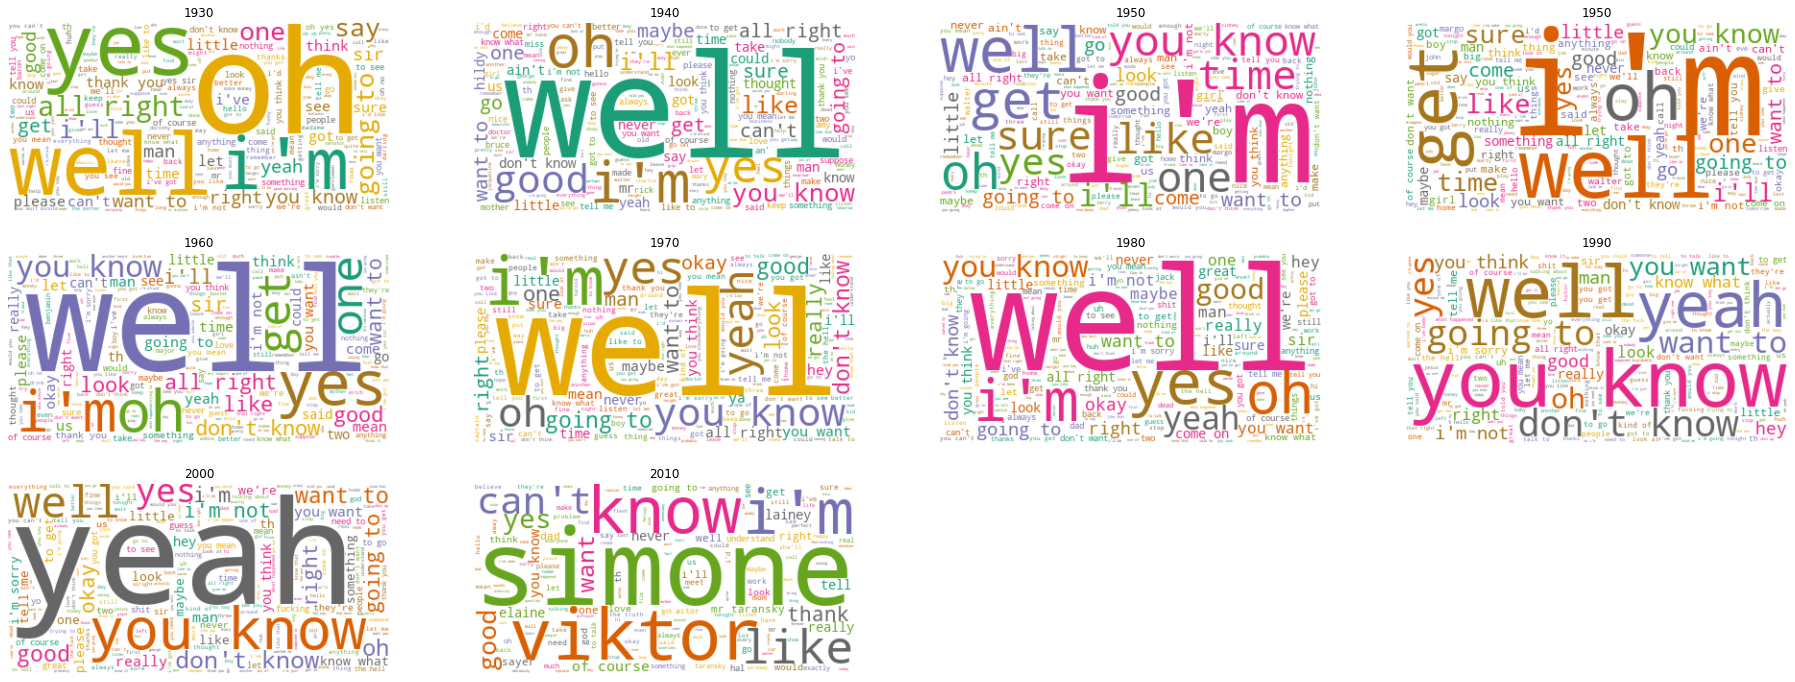

In [8]:
from wordcloud import WordCloud, STOPWORDS

## get stop words
from sklearn.feature_extraction import text 
from nltk.corpus import stopwords  

# Add new stop words
stop_words = stopwords.words('english')#text.ENGLISH_STOP_WORDS#.union(add_stop_words)

# prepare wordcloud
wc = WordCloud( 
    stopwords=stop_words,
     background_color="white"
    , colormap="Dark2"
    , max_font_size=150
    , random_state=42
    , normalize_plurals = False # cuts the ending s from plurals. however, this/was -> thi/wa
    )

# Reset the output dimensions
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [32, 12]

# List of decades
decades = ['193', '194', '195', '195', '196', '197', '198', '199', '200', '201']

for index, decade in enumerate(decades):
    # Create subplots for decade
    wc.generate(df_lines_per_decade[df_lines_per_decade['meta.release_decade'] == decade].text.to_string()) 
    # added lower() to identify stopwords
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(decade + '0')
    
plt.show()


In [9]:
### Ergebnis nicht zufriedenstellend, da alle wordclouds fast die selben Wörten enhalten
# seltsame wörter: thi -> normalize_plurals
# 2010 -- Simone

In [10]:


df_lines_per_decade.to_pickle("df_lines_per_decade.pkl")


In [11]:
df_lines_per_decade

,line_id,speaker,meta.movie_id,meta.character_name,text,meta.release_year,meta.release_decade
0,L1045,u0,m0,BIANCA,they do not!,1999,199
1,L1044,u2,m0,CAMERON,they do to!,1999,199
2,L985,u0,m0,BIANCA,i hope so.,1999,199
3,L984,u2,m0,CAMERON,she okay?,1999,199
4,L925,u0,m0,BIANCA,let's go.,1999,199
...,...,...,...,...,...,...,...
304708,L666371,u9030,m616,DURNFORD,lord chelmsford seems to want me to stay back ...,1979,197
304709,L666370,u9034,m616,VEREKER,i'm to take the sikali with the main column to...,1979,197
304710,L666369,u9030,m616,DURNFORD,"your orders, mr vereker?",1979,197
304711,L666257,u9030,m616,DURNFORD,"good ones, yes, mr vereker. gentlemen who can ...",1979,197
